### **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### **Importing Dataset**

In [ ]:
matches_df = pd.read_csv('/content/matches.csv')

## Exploring Data

In [ ]:
matches_df.head()   #getting first five rows of the table

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
matches_df.columns     #getting the name of columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [ ]:
matches_df.shape     #shape of the dataset

(756, 18)

In [ ]:
matches_df.describe().T      #statistical Information of numerical columns

,count,mean,std,min,25%,50%,75%,max
id,756.0,1792.178571,3464.478148,1.0,189.75,378.5,567.25,11415.0
season,756.0,2013.444444,3.366895,2008.0,2011.00,2013.0,2016.00,2019.0
dl_applied,756.0,0.025132,0.156630,0.0,0.00,0.0,0.00,1.0
win_by_runs,756.0,13.283069,23.471144,0.0,0.00,0.0,19.00,146.0
win_by_wickets,756.0,3.350529,3.387963,0.0,0.00,4.0,6.00,10.0


In [ ]:
matches_df.info()        #info of the mtaches_dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
matches_df.isnull().sum()      #missing values in the dataset

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

We have missing values in 'city' and 'umpire3' columns 


---

Treating the missing values

In [ ]:
matches_df = matches_df.drop(columns='umpire3')      #'umpire3' column has 80% of missing values, hence we will remove the column
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [ ]:
city_missing = matches_df[matches_df['city'].isnull()]           #rows having missing cities are extracted
city_missing

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus


In [ ]:
cities_of_dubai = matches_df['city'][matches_df['venue']=='Dubai International Cricket Stadium']
cities_of_dubai

461    NaN
462    NaN
466    NaN
468    NaN
469    NaN
474    NaN
476    NaN
Name: city, dtype: object

We can see that all the matches of season of 2014 having missing cities are played in stadium 'Dubai International Cricket Stadium', hence the city is definitely 'DUBAI'.

In [ ]:
matches_df['city'].fillna(value='Dubai', inplace=True)

In [ ]:
matches_df.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            2
umpire2            2
dtype: int64

Null Values of city are filled 

Now, treating 'Winner' column (removing rows)

In [ ]:
matches_df[matches_df['winner'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe


In [ ]:
matches_df.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            2
umpire2            2
dtype: int64

In [ ]:
matches_df.dropna(inplace=True)           #All the remaining null values  containing rows are removed

In [ ]:
matches_df.isnull().sum()   #checking the null values

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [ ]:
matches_df.shape

(750, 17)

Checking out winners!!

In [ ]:
winner_teams = matches_df['winner'].value_counts()              #matches won by teams in all the seasons
winner_teams

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     83
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                   9
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

Here we can see that **'Rising Pune Supergiant'** and **'Rising Pune Supergiants'** are two different teams but in actual it is one, we will merge them

In [ ]:
matches_df.replace(to_replace='Rising Pune Supergiants', value='Rising Pune Supergiant', inplace=True)

### **Number of Matches Won By Teams**??



In [ ]:
winner_teams = matches_df['winner'].value_counts()             #matches won by teams in all the seasons
winner_teams

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     83
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiant          15
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                   9
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

In [ ]:
winner_teams=winner_teams.reset_index()
winner_teams.columns = ['team','matches_won']
winner_teams

,team,matches_won
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,83
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Rising Pune Supergiant,15


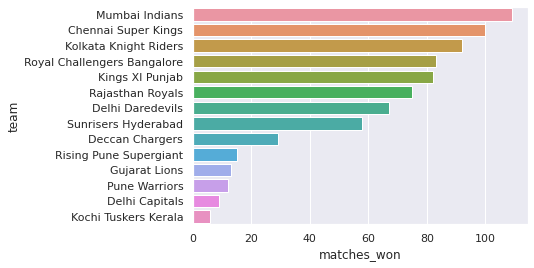

In [ ]:
sns.set()
sns.barplot(x='matches_won',y='team',data=winner_teams)

## **Number of seasons Played??**

In [ ]:
season_played = matches_df['season'].unique()
print("Seasons Played: ",season_played)

Seasons Played:  [2017 2008 2009 2010 2011 2012 2013 2014 2015 2016 2018 2019]


In [ ]:
matches_per_season = matches_df.groupby('season')['winner'].value_counts()
matches_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [ ]:
year=2008                                       # making a program to extract the requierd values
for item in matches_per_season.iteritems():
  if item[0][0]==year:
    print(item)
    year+=1

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Daredevils'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)


In [ ]:
year=2008                                                         #dataframe is created using that program by storing values
win_per_season = pd.DataFrame(columns=['year','team','wins'])
for item in matches_per_season.iteritems():
  if item[0][0]==year:
    print(item)
    temp_df = pd.DataFrame({
        'year': [item[0][0]],
        'team': [item[0][1]],
        'wins': [item[1]] 
        })
    win_per_season = win_per_season.append(temp_df, ignore_index=True)
    year+=1

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Daredevils'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)


In [ ]:
win_per_season

,year,team,wins
0,2008,Rajasthan Royals,13
1,2009,Delhi Daredevils,10
2,2010,Mumbai Indians,11
3,2011,Chennai Super Kings,11
4,2012,Kolkata Knight Riders,12
5,2013,Mumbai Indians,13
6,2014,Kings XI Punjab,12
7,2015,Chennai Super Kings,10
8,2016,Sunrisers Hyderabad,11
9,2017,Mumbai Indians,12


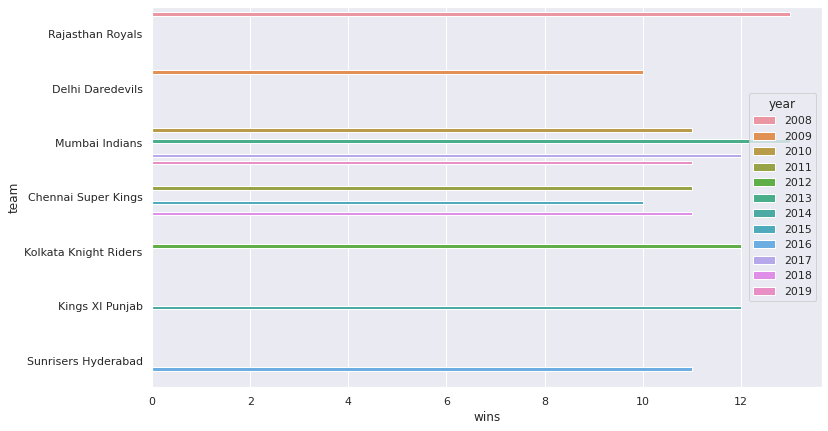

In [ ]:
# making barplot for the above dataframe
plt.figure(figsize=(12,7))
sns.barplot(x='wins',y='team',hue='year',data=win_per_season)

Mumbai Indians has secured the most wins in four seasons(2010, 2013, 2017, and 2019)

## **Venue**

In [ ]:
venue_counts = matches_df['venue'].value_counts()          #extracting venue counts
venue_counts = venue_counts.reset_index()                  # converting data to dataframe
venue_counts.columns = ['venue', 'matches_played']         # changing the name of columns
venue_counts

,venue,matches_played
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,70
3,Feroz Shah Kotla,66
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Subrata Roy Sahara Stadium,17


In [ ]:
venue_counts_ten = venue_counts.head(10)       #getting the top ten venues
venue_counts_ten

,venue,matches_played
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,70
3,Feroz Shah Kotla,66
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Subrata Roy Sahara Stadium,17


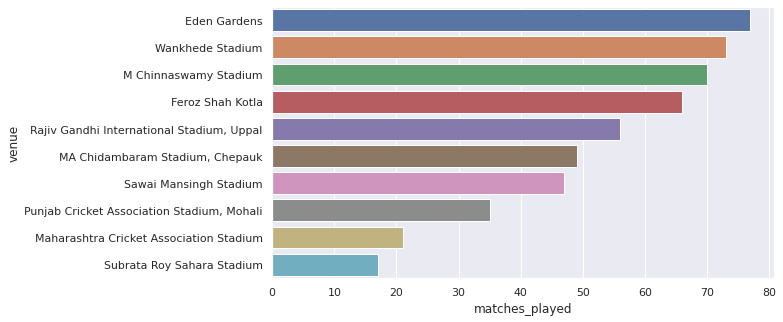

In [ ]:
# making barplot for venues
plt.figure(figsize=(9,5))
sns.barplot(x='matches_played',y='venue',data=venue_counts_ten)

 Eden Gardens has hosted the maximum number of IPL matches

## **Most Valuable Player**

In [ ]:
valuable_players = matches_df['player_of_match'].value_counts()   #extracting the man of the matches
valuable_players = valuable_players.reset_index()                 #converting it into dataframe
valuable_players.columns = ['player', 'matches']
valuable_players_ten = valuable_players.head(10)                 # extracting the top ten rows
valuable_players_ten

,player,matches
0,CH Gayle,21
1,AB de Villiers,20
2,DA Warner,17
3,RG Sharma,17
4,MS Dhoni,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,V Kohli,12


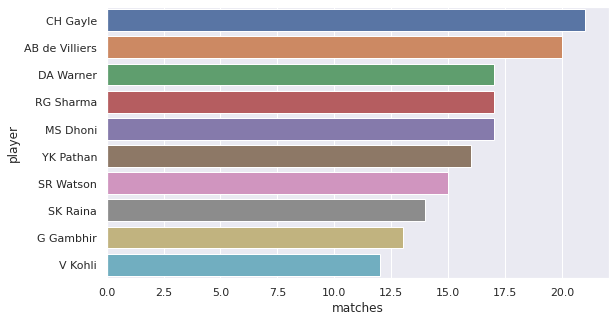

In [ ]:
# making a barplot
plt.figure(figsize=(9,5))
sns.barplot(x='matches',y='player',data=valuable_players_ten)

Cris Gayle is the player who won the most player of the match awards and hence is the most valuable player

## **The team that won the most number of toss**

In [ ]:
toss_winners = matches_df['toss_winner'].value_counts()          # extracting the requierd numbers
toss_winners = toss_winners.reset_index()                        # converted to dataframe
toss_winners.columns = ['team','toss_wins']                      # columns are renamed
toss_winners


,team,toss_wins
0,Mumbai Indians,98
1,Kolkata Knight Riders,92
2,Chennai Super Kings,89
3,Kings XI Punjab,81
4,Royal Challengers Bangalore,79
5,Delhi Daredevils,79
6,Rajasthan Royals,78
7,Sunrisers Hyderabad,46
8,Deccan Chargers,43
9,Pune Warriors,20


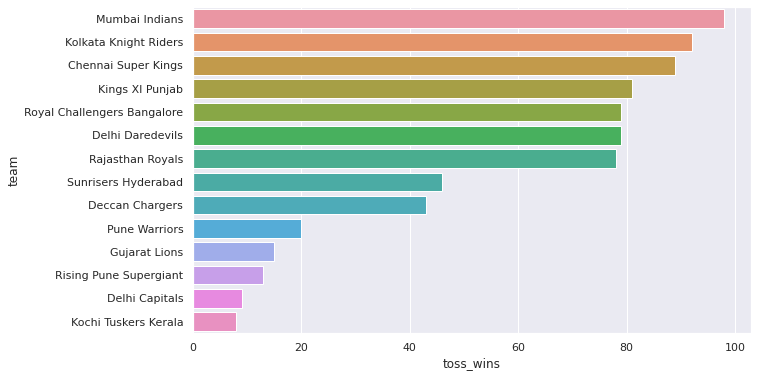

In [ ]:
# making a barplot
plt.figure(figsize=(10,6))
sns.barplot(x='toss_wins',y='team',data=toss_winners)

In Dataset we can see that 'A Nand Kishore' and 'A Nanda Kishore' are considered as two different umpires **AND** same is the case with 'VK Sharma' and 'Virender Kumar Sharma'

In [ ]:
matches_df.replace(to_replace='A Nand Kishore',value='A Nanda Kishore', inplace=True)   # both the names are corrected by replacing the real name
matches_df.replace(to_replace='VK Sharma',value='Virender Kumar Sharma', inplace=True)

## **Which umpire has officiated the most number of IPL matches on-field?**

In [ ]:
umpire1_counts = matches_df['umpire1'].value_counts()                         #umpire1 data
umpire1_counts = umpire1_counts.reset_index()
umpire1_counts.columns = ['umpire_name','matches']
umpire1_counts = umpire1_counts.sort_values(by='umpire_name').reset_index(drop=True)
umpire1_counts

,umpire_name,matches
0,A Deshmukh,3
1,A Nanda Kishore,12
2,AK Chaudhary,43
3,AM Saheba,3
4,AV Jayaprakash,2
5,AY Dandekar,13
6,Aleem Dar,38
7,Anil Chaudhary,10
8,Anil Dandekar,3
9,Asad Rauf,51


In [ ]:
umpire2_counts = matches_df['umpire2'].value_counts()                                    # umpire2 data
umpire2_counts = umpire2_counts.reset_index()
umpire2_counts.columns = ['umpire_name','matches']
umpire2_counts = umpire2_counts.sort_values(by='umpire_name').reset_index(drop=True)
umpire2_counts

,umpire_name,matches
0,A Deshmukh,3
1,A Nanda Kishore,9
2,A.D Deshmukh,6
3,AK Chaudhary,15
4,AL Hill,6
...,...,...
58,Ulhas Gandhe,3
59,VA Kulkarni,28
60,Vineet Kulkarni,5
61,Virender Kumar Sharma,15


In [ ]:
# combining the two dataframes -------- umpire1_counts and umpire2_counts
umpire_counts = pd.merge(umpire1_counts,umpire2_counts, how='outer',on='umpire_name')  #outer join of two dataframes (as SQL) is carried using the column 'umpire_name'
umpire_counts

,umpire_name,matches_x,matches_y
0,A Deshmukh,3.0,3.0
1,A Nanda Kishore,12.0,9.0
2,AK Chaudhary,43.0,15.0
3,AM Saheba,3.0,23.0
4,AV Jayaprakash,2.0,4.0
...,...,...,...
68,RJ Tucker,NaN,37.0
69,SD Ranade,NaN,2.0
70,Subroto Das,NaN,1.0
71,TH Wijewardene,NaN,5.0


In [ ]:
#fill the null values with zero
umpire_counts.fillna(value=0, inplace=True)

In [ ]:
umpire_counts

,umpire_name,matches_x,matches_y
0,A Deshmukh,3.0,3.0
1,A Nanda Kishore,12.0,9.0
2,AK Chaudhary,43.0,15.0
3,AM Saheba,3.0,23.0
4,AV Jayaprakash,2.0,4.0
...,...,...,...
68,RJ Tucker,0.0,37.0
69,SD Ranade,0.0,2.0
70,Subroto Das,0.0,1.0
71,TH Wijewardene,0.0,5.0


In [ ]:
umpire_counts['total_matches']=umpire_counts['matches_x']+umpire_counts['matches_y']  #total number of matches umpired
umpire_counts

,umpire_name,matches_x,matches_y,total_matches
0,A Deshmukh,3.0,3.0,6.0
1,A Nanda Kishore,12.0,9.0,21.0
2,AK Chaudhary,43.0,15.0,58.0
3,AM Saheba,3.0,23.0,26.0
4,AV Jayaprakash,2.0,4.0,6.0
...,...,...,...,...
68,RJ Tucker,0.0,37.0,37.0
69,SD Ranade,0.0,2.0,2.0
70,Subroto Das,0.0,1.0,1.0
71,TH Wijewardene,0.0,5.0,5.0


In [ ]:
umpire_counts_req = umpire_counts.drop(columns=['matches_x','matches_y'])
umpire_counts_req

,umpire_name,total_matches
0,A Deshmukh,6.0
1,A Nanda Kishore,21.0
2,AK Chaudhary,58.0
3,AM Saheba,26.0
4,AV Jayaprakash,6.0
...,...,...
68,RJ Tucker,37.0
69,SD Ranade,2.0
70,Subroto Das,1.0
71,TH Wijewardene,5.0


In [ ]:
# sorting the umpires according the number of matches umpired
umpire_counts_req = umpire_counts_req.sort_values(by='total_matches', ascending=False)  # sorting in descending order
umpire_counts_req = umpire_counts_req.reset_index(drop=True)                            # resetting index
umpire_counts_req

,umpire_name,total_matches
0,S Ravi,106.0
1,HDPK Dharmasena,86.0
2,C Shamshuddin,73.0
3,AK Chaudhary,58.0
4,SJA Taufel,55.0
...,...,...
68,K Srinivasan,2.0
69,SD Ranade,2.0
70,Sundaram Ravi,1.0
71,Nand Kishore,1.0


In [ ]:
umpire_counts_req_ten = umpire_counts_req.head(10)   #extracting top ten umpires
umpire_counts_req_ten

,umpire_name,total_matches
0,S Ravi,106.0
1,HDPK Dharmasena,86.0
2,C Shamshuddin,73.0
3,AK Chaudhary,58.0
4,SJA Taufel,55.0
5,M Erasmus,54.0
6,Asad Rauf,51.0
7,BR Doctrove,42.0
8,Nitin Menon,42.0
9,CK Nandan,41.0


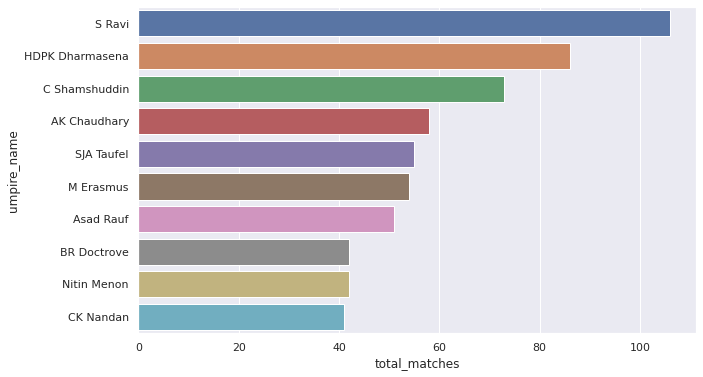

In [ ]:
# making plot
plt.figure(figsize=(10,6))
sns.barplot(x='total_matches',y='umpire_name',data=umpire_counts_req_ten)

Most number of matches are umpired by S Ravi i.e. 106 Matches

## **Which city has hosted the maximum number of IPL matches**

In [ ]:
city_df = matches_df['city'].value_counts()    #matches played in particular city are extracted
city_df = city_df.reset_index()                # datframe is created 
city_df.columns = ['city','matches_played']    # renaming the columns
city_df

,city,matches_played
0,Mumbai,101
1,Kolkata,77
2,Delhi,73
3,Hyderabad,64
4,Bangalore,63
5,Chennai,57
6,Jaipur,47
7,Chandigarh,46
8,Pune,38
9,Durban,15


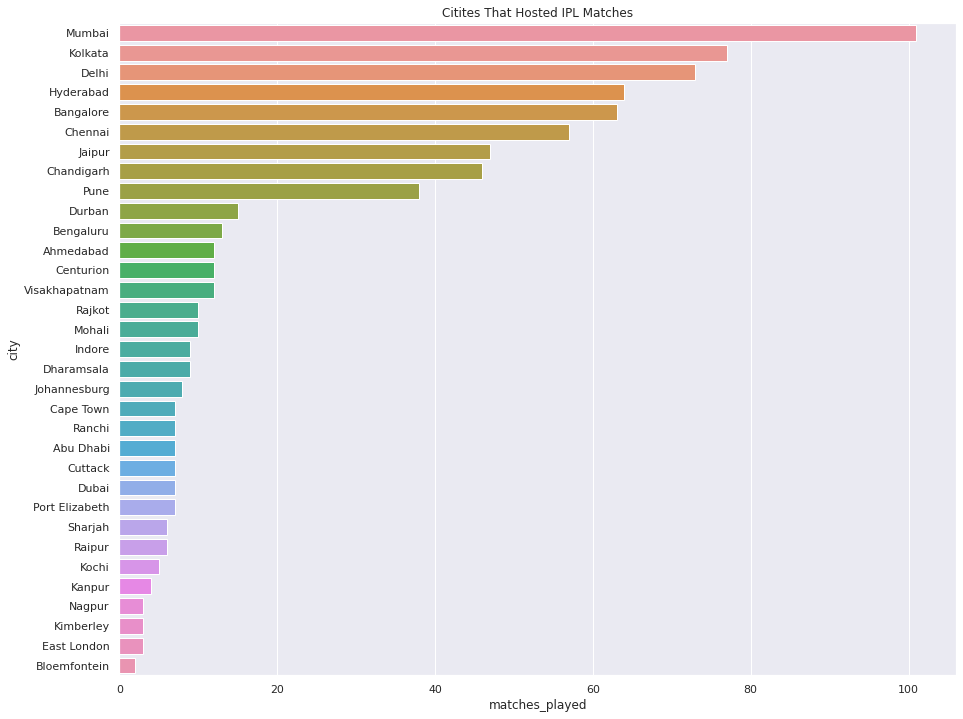

In [ ]:
# Plotting the data 
plt.figure(figsize=(15,12))
plt.title('Citites That Hosted IPL Matches')
sns.barplot(x='matches_played', y='city', data=city_df)